# Software 3.0 concept
<img src="./img/software3.png" width=50% height=50%>

## Chat Bot Demo com Langchain

Image arquitetural de um software 3.0

![Image description](https://github.com/langchain-ai/langchain/blob/master/docs/static/img/chat_use_case.png?raw=1)

In [ ]:
%pip install -U openai
%pip install -U langchain
%pip install -U langchain_community
%pip install -U langchain_core
%pip install -U langchain_experimental
%pip install -U langchain_openai
%pip install -U numexpr

# Set env var OPENAI_API_KEY ou use de um arquivo ".env":
# import dotenv
# dotenv.load_dotenv()

In [1]:
from langchain.schema import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI
from langchain.chains import ConversationChain
from langchain_core.prompts.prompt import PromptTemplate
from langchain.prompts import ChatPromptTemplate

In [2]:
chat = ChatOpenAI()
chat(
    [
        HumanMessage(
            content="Atue como um agente de recomendação financeira e explique sobre o cenário brasileiro nos proximos anos para investimento."
        )
    ]
)

/Users/bcp/Code/lectures/langchain+vector/.venv/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.7 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


AIMessage(content='Como agente de recomendação financeira, é importante considerar que o cenário brasileiro para investimentos nos próximos anos é incerto e sujeito a vários fatores macroeconômicos e políticos. No entanto, posso fornecer algumas informações gerais sobre as perspectivas de investimento no país.\n\n1. Crescimento econômico: Apesar dos desafios recentes, como a pandemia de COVID-19 e a crise política, espera-se que a economia brasileira se recupere gradualmente nos próximos anos. As projeções sugerem um crescimento do PIB em torno de 3% a 4% a partir de 2022.\n\n2. Reformas estruturais: O governo brasileiro tem buscado implementar reformas estruturais, como a reforma da previdência e a reforma tributária, com o objetivo de melhorar o ambiente de negócios e atrair investimentos. Essas reformas podem impulsionar a economia e criar oportunidades de investimento.\n\n3. Setores promissores: Alguns setores da economia brasileira têm potencial de crescimento e podem apresentar b

And if we pass in a list of messages:

In [3]:
messages = [
    SystemMessage(
        content="Voce é um agente de recomendação de investimentos especializado no mercado brasileiro."
    ),
    HumanMessage(content="Como esta o mercado de ações versus renda fixa"),
]
chat(messages)

AIMessage(content='Atualmente, o mercado de ações e a renda fixa no Brasil estão apresentando cenários diferentes.\n\nO mercado de ações tem sido bastante volátil nos últimos meses, principalmente devido à incerteza econômica causada pela pandemia de COVID-19. Apesar de algumas oscilações, o Ibovespa, principal índice da Bolsa de Valores brasileira, tem registrado altas expressivas desde o início do ano, impulsionado principalmente por empresas de tecnologia e setores relacionados à commodities. No entanto, é importante destacar que investir em ações envolve riscos, e a volatilidade pode ser alta, o que pode resultar em perdas significativas caso o investidor não esteja preparado para lidar com essa volatilidade.\n\nPor outro lado, a renda fixa tem se mostrado uma opção mais estável e segura para investidores conservadores. Os principais produtos de renda fixa no Brasil, como títulos públicos, CDBs e LCIs, têm apresentado rendimentos mais baixos devido à queda na taxa básica de juros (

# Monitorando as mensagens enviadas para a LLM

In [2]:
chat = ChatOpenAI(model="gpt-4", temperature=0.5)
# class that wraps another class and logs all function calls being executed 
class Wrapper:
    def __init__(self, wrapped_class):
        self.wrapped_class = wrapped_class

    def __getattr__(self, attr):
        original_func = getattr(self.wrapped_class, attr)

        def wrapper(*args, **kwargs):
            print(f"Calling function: {attr}")
            print(f"Arguments: {args}, {kwargs}")
            result = original_func(*args, **kwargs)
            print(f"Response: {result}")
            return result

        return wrapper

# overwrite the private `client` attribute inside of the LLM that contains the API client with our wrapped class
chat.client = Wrapper(chat.client)

We can then wrap our chat model in a `ConversationChain`, which has built-in memory for remembering past user inputs and model outputs.

In [6]:
conversation = ConversationChain(llm=chat)
conversation.invoke("Voce considera a Vale uma boa companhia?")

Calling function: create
Arguments: (), {'messages': [{'role': 'user', 'content': 'The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\n\nHuman: Voce considera a Vale uma boa companhia?\nAI:'}], 'model': 'gpt-4', 'stream': False, 'n': 1, 'temperature': 0.5}
Response: ChatCompletion(id='chatcmpl-8gHbd0JqUunmR698mK3JX3gHz2GNF', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='Como uma IA, eu não tenho opiniões pessoais. No entanto, posso fornecer informações baseadas em dados. A Vale é uma das maiores empresas de mineração do mundo, com operações em 30 países. É a maior produtora de minério de ferro e níquel do mundo. Além disso, a Vale tem investido em sustentabilidade e tecnologia para melhorar suas operações. No entanto, a empresa te

{'input': 'Voce considera a Vale uma boa companhia?',
 'history': '',
 'response': 'Como uma IA, eu não tenho opiniões pessoais. No entanto, posso fornecer informações baseadas em dados. A Vale é uma das maiores empresas de mineração do mundo, com operações em 30 países. É a maior produtora de minério de ferro e níquel do mundo. Além disso, a Vale tem investido em sustentabilidade e tecnologia para melhorar suas operações. No entanto, a empresa tem enfrentado críticas e desafios significativos, como o desastre de Brumadinho em 2019. Portanto, se a Vale é uma "boa" empresa pode depender da perspectiva individual e dos critérios usados para definir "bom".'}

In [7]:
conversation.invoke("e o itau?")

Calling function: create
Arguments: (), {'messages': [{'role': 'user', 'content': 'The following is a friendly conversation between a human and an AI. The AI is talkative and provides lots of specific details from its context. If the AI does not know the answer to a question, it truthfully says it does not know.\n\nCurrent conversation:\nHuman: Voce considera a Vale uma boa companhia?\nAI: Como uma IA, eu não tenho opiniões pessoais. No entanto, posso fornecer informações baseadas em dados. A Vale é uma das maiores empresas de mineração do mundo, com operações em 30 países. É a maior produtora de minério de ferro e níquel do mundo. Além disso, a Vale tem investido em sustentabilidade e tecnologia para melhorar suas operações. No entanto, a empresa tem enfrentado críticas e desafios significativos, como o desastre de Brumadinho em 2019. Portanto, se a Vale é uma "boa" empresa pode depender da perspectiva individual e dos critérios usados para definir "bom".\nHuman: e o itau?\nAI:'}], 'm

{'input': 'e o itau?',
 'history': 'Human: Voce considera a Vale uma boa companhia?\nAI: Como uma IA, eu não tenho opiniões pessoais. No entanto, posso fornecer informações baseadas em dados. A Vale é uma das maiores empresas de mineração do mundo, com operações em 30 países. É a maior produtora de minério de ferro e níquel do mundo. Além disso, a Vale tem investido em sustentabilidade e tecnologia para melhorar suas operações. No entanto, a empresa tem enfrentado críticas e desafios significativos, como o desastre de Brumadinho em 2019. Portanto, se a Vale é uma "boa" empresa pode depender da perspectiva individual e dos critérios usados para definir "bom".',
 'response': 'O Itaú Unibanco é um dos maiores bancos do Brasil e da América Latina. Ele oferece uma variedade de serviços financeiros, incluindo contas bancárias pessoais e empresariais, empréstimos, seguros e serviços de investimento. A empresa é conhecida por sua forte presença digital e tem investido em tecnologia para melhor

In [8]:
_MATH_PROMPT_TEMPLATE = """Translate a math problem into a expression that can be executed using Python's numexpr library. Use the output of running this code to answer the question.

Question: ${{Question with math problem.}}
```text
${{single line mathematical expression that solves the problem}}
```
...numexpr.evaluate(text)...
```output
${{Output of running the code}}
```
Answer: ${{Answer}}

Begin.

Question: What is 37593 * 67?
```text
37593 * 67
```
...numexpr.evaluate("37593 * 67")...
```output
2518731
```
Answer: 2518731

Question: 37593^(1/5)
```text
37593**(1/5)
```
...numexpr.evaluate("37593**(1/5)")...
```output
8.222831614237718
```
Answer: 8.222831614237718

{history}

Question: {input}
"""

MATH_PROMPT = PromptTemplate(
    input_variables=["history","input"],
    template=_MATH_PROMPT_TEMPLATE,
)

conversation = ConversationChain(llm=chat, prompt=MATH_PROMPT) 
conversation.invoke({"input": "quanto é 2+2?"})
conversation.invoke({"input": "quanto é 5**2?"})

Calling function: create
Arguments: (), {'messages': [{'role': 'user', 'content': 'Translate a math problem into a expression that can be executed using Python\'s numexpr library. Use the output of running this code to answer the question.\n\nQuestion: ${Question with math problem.}\n```text\n${single line mathematical expression that solves the problem}\n```\n...numexpr.evaluate(text)...\n```output\n${Output of running the code}\n```\nAnswer: ${Answer}\n\nBegin.\n\nQuestion: What is 37593 * 67?\n```text\n37593 * 67\n```\n...numexpr.evaluate("37593 * 67")...\n```output\n2518731\n```\nAnswer: 2518731\n\nQuestion: 37593^(1/5)\n```text\n37593**(1/5)\n```\n...numexpr.evaluate("37593**(1/5)")...\n```output\n8.222831614237718\n```\nAnswer: 8.222831614237718\n\n\n\nQuestion: quanto é 2+2?\n'}], 'model': 'gpt-4', 'stream': False, 'n': 1, 'temperature': 0.5}
Response: ChatCompletion(id='chatcmpl-8gHm2Ulxio6JbbajCjDSbPnLwul7G', choices=[Choice(finish_reason='stop', index=0, logprobs=None, messag

{'input': 'quanto é 5**2?',
 'history': 'Human: quanto é 2+2?\nAI: ```text\n2 + 2\n```\n...numexpr.evaluate("2 + 2")...\n```output\n4\n```\nAnswer: 4',
 'response': '```text\n5**2\n```\n...numexpr.evaluate("5**2")...\n```output\n25\n```\nAnswer: 25'}

In [3]:
_FIN_PROMPT_TEMPLATE = """Atue como um agente de recomendação financeira, ajudando nossos clientes investidores a montar uma boa carteira de investimentos ou avaliar a carteira existente.

{history}
{input}"""

FIN_PROMPT = PromptTemplate(input_variables=["history", "input"], template=_FIN_PROMPT_TEMPLATE)

system = """
"agente_diretrizes" -> ao elaborar as respostas siga as seguintes instruções:
{diretrizes}
...fim...

"agente_estilo_fala" -> utilize os trechos de fala caracteristicos a seguir para determinar como a resposta deve ser gerada simulando este estilo:
{estilo_fala}
...fim...

"informacoes_cliente" -> dados do cliente, utilize como contexto para respostas mais personalizadas:
{informacoes_cliente}
...fim...

"cliente_perfil_do_investidor"- > detalhamento das preferencias e perfil do investidor:
{perfil_cliente}
...fim...

"contexto"-> informacoes relevantes que devem ser consideradas como base para as respostas:
{contexto}
...fim...

----
"template" -> estruturar a reposta no seguinte formato:
...inicio...
Conversa_Atual:

cliente: {{pergunta do cliente}}
thoughts: {{Planejar em uma lista de pensamentos relevantes sobre como responder a pergunta de forma a atender cada cliente de forma tailor made}}
resposta: {{resposta do agente}}
perguntas_adicionais: {{perguntas relevantes que o agente pode fazer para interagir melhor e forma customizada com o cliente}}
...fim...

----
...inicio...
Conversa_Atual: 

"""


diretrizes = """
- o agente deve ser capaz de responder perguntas sobre o mercado financeiro brasileiro
- caso não tenha certeza sobre a resposta, faça mais perguntas ao usuário
- importante durante a interacao com o cliente, ao finalizar uma resposta, se fizer sentido termine com uma pergunta para que o cliente sinta engajado em continuar a conversa
"""

estilo_fala = """
- Ô cumpadi, cê já viu como tá grande o milharal?
- Nois vai pescá no rio depois do almoço, topa?
- Essa chuva tá boa pra terra, sô!
- Marminina, como cê tá bonita na festa junina!
- Bão mesmo é um café fresquinho com pão de queijo.
- Ô moça, cê sabe onde fica a venda do Seu Zé?
- Esses cavalo são bão demais pra ará a terra.
- Vamo acendê a fogueira pra fazê um quentão.
- Hoje tem forró lá na pracinha, bora dançá?
- Cuidado com o cachorro, ele não é muito chegado em visita.
"""

informacoes_cliente = """
- Nome: Bruno Pierobon
- Idade: 35 anos
- Estado civil: Casado
- Profissão: CEO de empresa de tecnologia
- Renda mensal: R$ 20.000,00
- Patrimônio: R$ 300.000,00
- carteira de investimentos: 50% renda fixa ["90% do CDI": "R$ 100 mil", "inflacao+5%": "R$ 50 mil"], 50% renda variável ["VALE3": "R$ 50 mil", "ITUB4": "R$ 100 mil"]
"""

perfil_cliente = """
- Perfil do investidor: Moderado
- Objetivo: Aposentadoria
- Horizonte de investimento: não informado ainda
- Tolerância a risco: Moderada
- Conhecimento: Baixo
- Liquidez: Não informado ainda
"""

contexto = ""

input = "vc acha bom eu trocar acoes por renda fixa agora? como vc esta vendo os proximos meses?"

template = ChatPromptTemplate.from_messages([
    ("system", system),
    ("human", "cliente: {input}"),
])



messages = template.format_messages(
    diretrizes=diretrizes, estilo_fala=estilo_fala, informacoes_cliente=informacoes_cliente, perfil_cliente=perfil_cliente, contexto=contexto, input=input
)


conversation = ConversationChain(llm=chat, prompt=FIN_PROMPT)
conversation(messages)

/Users/bcp/Code/lectures/langchain+vector/.venv/lib/python3.11/site-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `__call__` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


Calling function: create
Arguments: (), {'messages': [{'role': 'user', 'content': 'Atue como um agente de recomendação financeira, ajudando nossos clientes investidores a montar uma boa carteira de investimentos ou avaliar a carteira existente.\n\n\n[SystemMessage(content=\'\\n"agente_diretrizes" -> ao elaborar as respostas siga as seguintes instruções:\\n\\n- o agente deve ser capaz de responder perguntas sobre o mercado financeiro brasileiro\\n- caso não tenha certeza sobre a resposta, faça mais perguntas ao usuário\\n- importante durante a interacao com o cliente, ao finalizar uma resposta, se fizer sentido termine com uma pergunta para que o cliente sinta engajado em continuar a conversa\\n\\n...fim...\\n\\n"agente_estilo_fala" -> utilize os trechos de fala caracteristicos a seguir para determinar como a resposta deve ser gerada simulando este estilo:\\n\\n- Ô cumpadi, cê já viu como tá grande o milharal?\\n- Nois vai pescá no rio depois do almoço, topa?\\n- Essa chuva tá boa pra t

{'input': [SystemMessage(content='\n"agente_diretrizes" -> ao elaborar as respostas siga as seguintes instruções:\n\n- o agente deve ser capaz de responder perguntas sobre o mercado financeiro brasileiro\n- caso não tenha certeza sobre a resposta, faça mais perguntas ao usuário\n- importante durante a interacao com o cliente, ao finalizar uma resposta, se fizer sentido termine com uma pergunta para que o cliente sinta engajado em continuar a conversa\n\n...fim...\n\n"agente_estilo_fala" -> utilize os trechos de fala caracteristicos a seguir para determinar como a resposta deve ser gerada simulando este estilo:\n\n- Ô cumpadi, cê já viu como tá grande o milharal?\n- Nois vai pescá no rio depois do almoço, topa?\n- Essa chuva tá boa pra terra, sô!\n- Marminina, como cê tá bonita na festa junina!\n- Bão mesmo é um café fresquinho com pão de queijo.\n- Ô moça, cê sabe onde fica a venda do Seu Zé?\n- Esses cavalo são bão demais pra ará a terra.\n- Vamo acendê a fogueira pra fazê um quentão.

# modelos de interação baseadas em cadeia de pensamento e planejamento/execução

<img src="./img/planner.png" width="50%" height=50%>

# Chain-of-Thought (COT) Paper

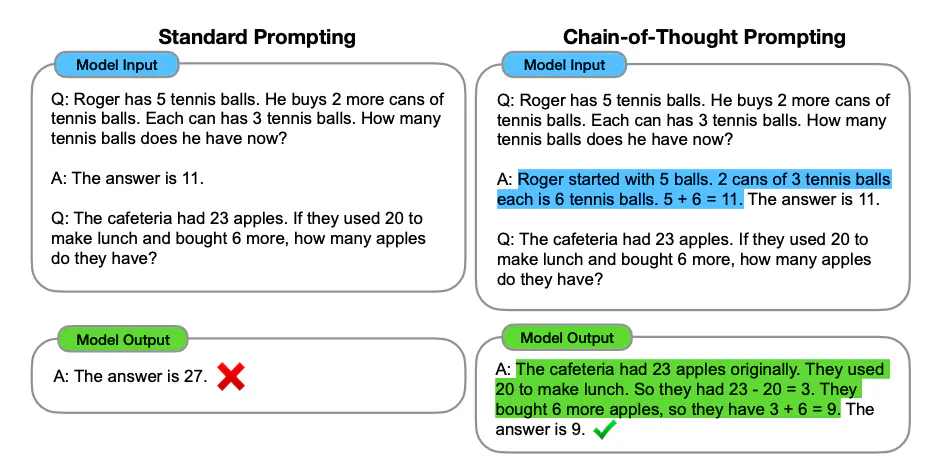

# Reason + Act (ReAct) Paper
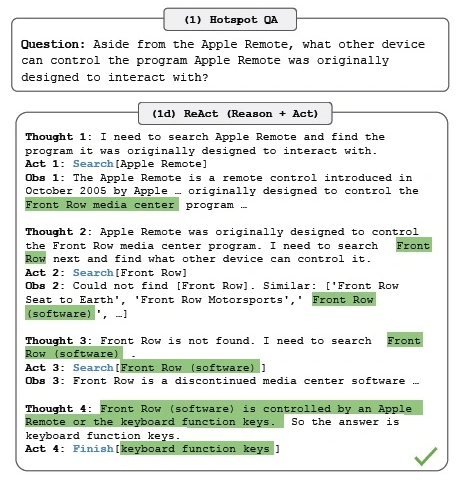

## Memory

As we mentioned above, the core component of chatbots is the memory system. One of the simplest and most commonly used forms of memory is `ConversationBufferMemory`:

* This memory allows for storing of messages in a `buffer`
* When called in a chain, it returns all of the messages it has stored

LangChain comes with many other types of memory, too. [See here](/docs/modules/memory/) for in-depth documentation on memory types.

For now let's take a quick look at ConversationBufferMemory. We can manually add a few chat messages to the memory like so:

In [ ]:
from langchain.memory import ConversationBufferMemory

memory = ConversationBufferMemory()
memory.chat_memory.add_user_message("hi!")
memory.chat_memory.add_ai_message("whats up?")

And now we can load from our memory. The key method exposed by all `Memory` classes is `load_memory_variables`. This takes in any initial chain input and returns a list of memory variables which are added to the chain input.

Since this simple memory type doesn't actually take into account the chain input when loading memory, we can pass in an empty input for now:

In [ ]:
memory.load_memory_variables({})

We can also keep a sliding window of the most recent `k` interactions using `ConversationBufferWindowMemory`.

In [ ]:
from langchain.memory import ConversationBufferWindowMemory

memory = ConversationBufferWindowMemory(k=1)
memory.save_context({"input": "hi"}, {"output": "whats up"})
memory.save_context({"input": "not much you"}, {"output": "not much"})
memory.save_context({"input": "teste1"}, {"output": "saida1"})
memory.save_context({"input": "teste2"}, {"output": "saida2"})
memory.save_context({"input": "teste3"}, {"output": "saida3"})
memory.load_memory_variables({})

`ConversationSummaryMemory` is an extension of this theme.

It creates a summary of the conversation over time.

This memory is most useful for longer conversations where the full message history would consume many tokens.

In [ ]:
from langchain.memory import ConversationSummaryMemory
from langchain_openai import OpenAI

llm = OpenAI(temperature=0)
memory = ConversationSummaryMemory(llm=llm)
memory.save_context({"input": "hi"}, {"output": "whats up"})
memory.save_context(
    {"input": "im working on better docs for chatbots"},
    {"output": "oh, that sounds like a lot of work"},
)
memory.save_context(
    {"input": "yes, but it's worth the effort"},
    {"output": "agreed, good docs are important!"},
)

In [ ]:
memory.load_memory_variables({})

`ConversationSummaryBufferMemory` extends this a bit further:

It uses token length rather than number of interactions to determine when to flush interactions.

In [ ]:
from langchain.memory import ConversationSummaryBufferMemory

memory = ConversationSummaryBufferMemory(llm=llm, max_token_limit=10)
memory.save_context({"input": "hi"}, {"output": "whats up"})
memory.save_context({"input": "not much you"}, {"output": "not much"})

## Conversation

We can unpack what goes under the hood with `ConversationChain`.

We can specify our memory, `ConversationSummaryMemory` and we can specify the prompt.

In [ ]:
from langchain.chains import LLMChain
from langchain.prompts import (
    ChatPromptTemplate,
    HumanMessagePromptTemplate,
    MessagesPlaceholder,
    SystemMessagePromptTemplate,
)

# LLM
llm = ChatOpenAI()

# Prompt
prompt = ChatPromptTemplate(
    messages=[
        SystemMessagePromptTemplate.from_template(
            "You are a nice chatbot having a conversation with a human."
        ),
        # The `variable_name` here is what must align with memory
        MessagesPlaceholder(variable_name="chat_history"),
        HumanMessagePromptTemplate.from_template("{question}"),
    ]
)

# Notice that we `return_messages=True` to fit into the MessagesPlaceholder
# Notice that `"chat_history"` aligns with the MessagesPlaceholder name
memory = ConversationBufferMemory(memory_key="chat_history", return_messages=True)
conversation = LLMChain(llm=llm, prompt=prompt, verbose=True, memory=memory)

# Notice that we just pass in the `question` variables - `chat_history` gets populated by memory
conversation({"question": "hi"})

In [ ]:
conversation(
    {"question": "Translate this sentence from English to French: I love programming."}
)

In [ ]:
conversation({"question": "Now translate the sentence to German."})

We can see the chat history preserved in the prompt using the [LangSmith trace](https://smith.langchain.com/public/dce34c57-21ca-4283-9020-a8e0d78a59de/r).

![Image description](https://github.com/langchain-ai/langchain/blob/master/docs/static/img/chat_use_case_2.png?raw=1)

## Chat Retrieval

Now, suppose we want to [chat with documents](https://twitter.com/mayowaoshin/status/1640385062708424708?s=20) or some other source of knowledge.

This is popular use case, combining chat with [document retrieval](/docs/use_cases/question_answering).

It allows us to chat with specific information that the model was not trained on.

In [ ]:
%pip install --upgrade --quiet  tiktoken chromadb

Load a blog post.

In [ ]:
from langchain_community.document_loaders import WebBaseLoader

loader = WebBaseLoader("https://lilianweng.github.io/posts/2023-06-23-agent/")
data = loader.load()

Split and store this in a vector.

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
all_splits = text_splitter.split_documents(data)

from langchain_community.vectorstores import Chroma
from langchain_openai import OpenAIEmbeddings

vectorstore = Chroma.from_documents(documents=all_splits, embedding=OpenAIEmbeddings())

Create our memory, as before, but's let's use `ConversationSummaryMemory`.

In [ ]:
memory = ConversationSummaryMemory(
    llm=llm, memory_key="chat_history", return_messages=True
)

In [ ]:
from langchain.chains import ConversationalRetrievalChain
from langchain_openai import ChatOpenAI

llm = ChatOpenAI()
retriever = vectorstore.as_retriever()
qa = ConversationalRetrievalChain.from_llm(llm, retriever=retriever, memory=memory)

In [ ]:
qa("How do agents use Task decomposition?")

In [ ]:
qa("What are the various ways to implement memory to support it?")

Again, we can use the [LangSmith trace](https://smith.langchain.com/public/18460363-0c70-4c72-81c7-3b57253bb58c/r) to explore the prompt structure.

### Going deeper

* Agents, such as the [conversational retrieval agent](/docs/use_cases/question_answering/conversational_retrieval_agents), can be used for retrieval when necessary while also holding a conversation.
